In [8]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


# Column names
colnames = ['Node', 'Position1', 'Position2']
position_data = pd.read_csv('sub_data_file.csv', header=None, names=colnames, index_col=['Node']) # Reading and assigning the nodes as index, to remove redundancy
position_data.head()

,Position1,Position2
Node,,
1,4873.6,4886.7
2,-3295.7,-4330.5
3,-2407.1,4397.4
4,-1027.0,-4828.9
5,-4260.1,1838.4


In [11]:
# Basic information
print(f'Basic dataset information : \n{position_data.info()}')
print(f'Checking null values : \n{position_data.isnull().sum()}')
print(f'Checking unique values of : \n{position_data.index.nunique()}')

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Position1  150 non-null    float64
 1   Position2  150 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB
Basic dataset information : 
None
Checking null values : 
Position1    0
Position2    0
dtype: int64
Checking unique values of : 
150


> There are no null values and nothing there are 150 points in so everything is working right

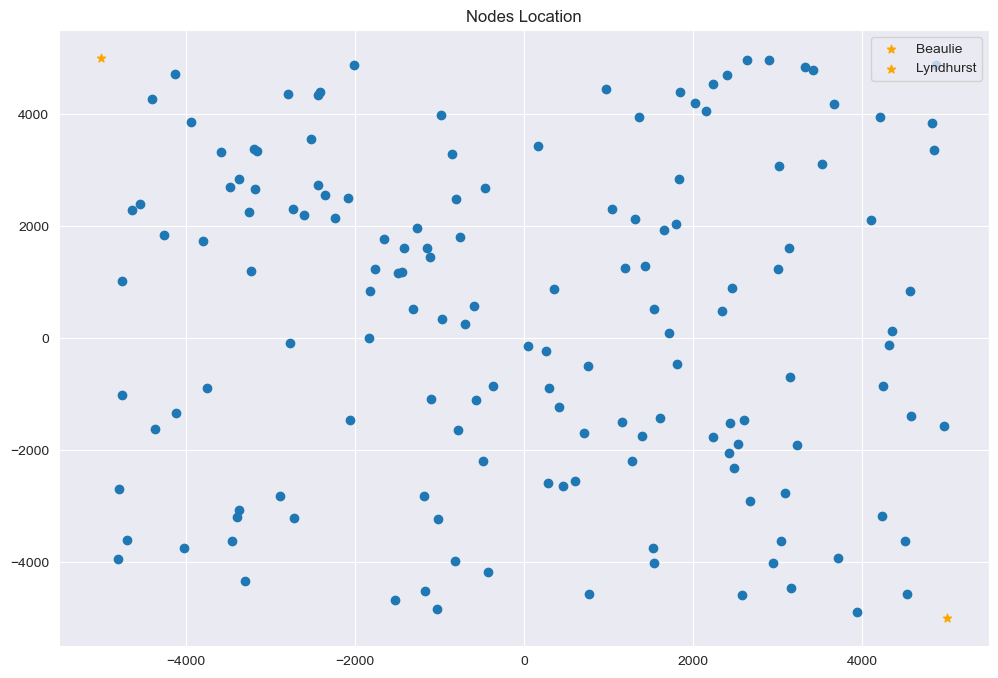

In [21]:
# Plotting the points on the map
coordinate_x = position_data['Position1']
coordinate_y = position_data['Position2']

# Input Beaulieu and Lyndhurst coordinates
beaulie_coordinate = (5000, -5000)
lyndhurst_coordinate = (-5000, 5000)

plt.figure(figsize = (12, 8))
plt.title('Nodes Location')
plt.scatter(coordinate_x, coordinate_y)
plt.scatter(beaulie_coordinate[0], beaulie_coordinate[1], label='Beaulie', color='orange', marker='*')
plt.scatter(lyndhurst_coordinate[0], lyndhurst_coordinate[1], label='Lyndhurst', color='orange', marker='*')
plt.legend(loc='upper right')
plt.show()

1. Calculating the distance

In [24]:
# Distance function
def calculate_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
distances = [] # List for appending in dataframe
for i in range(len(position_data)):
    for j in range(i + 1, len(position_data)):
        id1 = position_data.index[i]
        id2 = position_data.index[j]
        x1, y1 = position_data.iloc[i]['Position1'], position_data.iloc[i]['Position2']
        x2, y2 = position_data.iloc[j]['Position1'], position_data.iloc[j]['Position2']
        distance = calculate_distance(x1, x2, y1, y2)
        distances.append({"point1": id1, "point2": id2, "distance": distance})

distance_df = pd.DataFrame(distances)
print(f'There are total of {len(distance_df)} points.')
distance_df.head()

There are total of 11175 points.


,point1,point2,distance
0,1,2,12316.421490
1,1,3,7297.123199
2,1,4,11367.056071
3,1,5,9628.946390
4,1,6,3660.094705


> We get a total of 11175 value points each with the distance between one another.

`Given conditions`
---
| Distance (d) | Transmission rate (Mbps) |
|--------------|--------------------------|
| d >= 3000 m  | 0                        |
| 3000 m > d >= 2500 | 0                        |
| 2500 m > d >= 2000 m | 0                        |
| 2000 m > d >= 1500 m | 0                        |
| 1500 m > d >= 1000 m  | 0                        |
| 1000 m > d >= 500 m | 0                        |
| 500 m > d  | 0                           |

3. Now Add another row checking for transmission rate constraint

In [27]:
# define labels and bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = [7,5,4,3,2,1,0]
distance_df['transmission'] = pd.cut(distance_df['distance'], bins=bins, labels=labels, right=False)
distance_df.head()

,point1,point2,distance,transmission
0,1,2,12316.421490,0
1,1,3,7297.123199,0
2,1,4,11367.056071,0
3,1,5,9628.946390,0
4,1,6,3660.094705,0


In [29]:
distance_df['transmission'].value_counts() # The unique number of transmission rate for nodes

transmission
0    8663
1     667
2     600
3     503
4     395
5     248
7      99
Name: count, dtype: int64